In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
import os
from sklearn.preprocessing import StandardScaler

## Options

In [2]:
# == Options ==
pd.set_option("display.max_columns", None)
# pd.set_option("display.max_rows", None)

## Plotting Functions


In [3]:
def plot_correlation_heatmap(data: pd.DataFrame, columns: list):
    """
    Plot correlation heatmap of specific columns
    """
    correlation_matrix = data[columns].corr()
    plt.figure(figsize=(13, 12))
    sns.heatmap(correlation_matrix, annot=True, cmap="cool", linewidth=0.5)
    plt.title("Correlation Heatmap for selected attributes")
    plt.show()

def plot_distributions(data: pd.DataFrame):
    """
    Plot distributions of numeric data
    """
    sns.set_style("whitegrid", {"grid_linestyle": "--"})
    columns = data.columns
    num_plots = len(columns)
    num_rows = math.ceil(num_plots / 2)
    num_columns = 2

    fig, axes = plt.subplots(num_rows, num_columns, figsize=(12, 12))
    axes = axes.ravel()
    for i, column in enumerate(columns):
        sns.histplot(data[column], ax=axes[i], kde=True)
        axes[i].set_title(f"Distribution of {column}")
        axes[i].set_xlabel(column)
        axes[i].grid(axis="y", linestyle="--", alpha=0.6)
        plt.xlim(xmin=0)

    if num_plots % 2 != 0:
        axes.flat[-1].set_visible(False)
   
    plt.tight_layout()
    plt.show()

def plot_individual_distributions(data: pd.DataFrame):
    """
    Plot individual distributions of numeric data
    """
    sns.set_style("whitegrid", {"grid_linestyle": "--"})
    columns = data.columns

    for column in columns:
        plt.figure(figsize=(6, 4))
        sns.histplot(data[column], kde=True)
        # plt.title(f"Distribution of {column}")
        plt.xlabel(column)
        plt.grid(axis="y", linestyle="--", alpha=0.6)
        plt.xlim(xmin=0)
        plt.tight_layout()

        output_dir = "figures"
        output_filename = os.path.join(output_dir, f"{column}_distribution.png")
        plt.savefig(output_filename)
        plt.close()

def plot_violin(data: pd.DataFrame, column: str):
    """
    Plot violin 
    """    
    plt.figure(figsize=(6, 6))
    sns.violinplot(y=column, data=data, orient="v")
    # plt.title(f"Violin Plot of {column}")
    plt.show()

# - PCA Analysis

def plot_PCA_variance(numbers: list, ratios: list):
    """
    Plot variance ratio
    """
    plt.grid(True)
    plt.plot(numbers, ratios, marker="o")
    plt.xlabel("n_components")
    plt.ylabel("Explained Variance Ratio")
    # plt.title("n_components vs. Explained Variance Ratio")
    plt.ylim(ymin=0)
    plt.xlim(xmin=0)
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.figure(figsize=(4, 4))
    plt.show()


def plot_PCA_directions(data_numeric, numbers):
    """
    Plot directions
    """
    # Assumption: data is already normalized 
    n_plots = len(numbers)
    n_cols = min(n_plots, 2)
    n_rows = (n_plots + n_cols - 1) // n_cols

    fig_width = 4 * n_cols 
    fig_height = 4 * n_rows
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(fig_width, fig_height))
    fig.subplots_adjust(hspace=0.7)

    if n_plots == 1:
        axes = np.array([axes])
    
    component_colors = plt.cm.viridis(np.linspace(0, 1, max(numbers) + 1))

    for i, number in enumerate(numbers):
        row = i // n_cols
        col = i % n_cols

        pca = PCA(n_components=number)
        pca.fit_transform(data_numeric)
        principal_direction = pca.components_

        if n_rows > 1:
            ax = axes[row, col]
        else:
            ax = axes[col]

        # ax.set_title(f"Principal Directions for {number} Components")
        for j, direction in enumerate(principal_direction):
            color = component_colors[j]
            ax.quiver(0, 0, direction[0], direction[1], angles="xy", scale_units="xy", scale=1.0, color=color, label=f"Component {j + 1}")
        ax.set_xlim(-1, 1)
        ax.set_ylim(-1, 1)
        ax.set_xlabel("X")
        ax.set_ylabel("Y")

        ax.grid(linestyle="--", linewidth=0.5, alpha=0.6, color="gray")

    common_legend = fig.legend(handles=[plt.Line2D([0], [0], color=component_colors[i], label=f"Component {i + 1}") for i in range(max(numbers) + 1)], title="Components", loc="upper right", bbox_to_anchor=(1.2, 1))
    for handle in common_legend.legendHandles:
        handle.set_visible(True)

    for i in range(n_plots, n_rows * n_cols):
        fig.delaxes(axes.flatten()[i])

    # plt.suptitle("PCA Components Directions", fontsize=16)
    plt.tight_layout()
    plt.show()

def plot_individual_violin_plots(data: pd.DataFrame):
    """
    Plot individual violin plots of numeric data
    """
    sns.set_style("whitegrid", {"grid_linestyle": "--"})
    columns = data.columns

    for column in columns:
        plt.figure(figsize=(6, 6))
        sns.violinplot(y=column, data=data, orient="v", color="skyblue")
        # plt.title(f"Violin Plot of {column}")
        plt.xlabel(column)
        plt.grid(axis="y", linestyle="--", alpha=0.6)
        plt.tight_layout()

        output_dir = "figures"
        output_filename = os.path.join(output_dir, f"{column}_violin.png")
        plt.savefig(output_filename)
        plt.close()

In [4]:
# == Reading the dataset ==
dataset_path = "./data/SAheart.csv"
data = pd.read_csv(dataset_path)

In [5]:
# == Rename selected columns (if needed) ==
columns = []
# Replace _ if existing
data = data.rename(columns={column: column.replace("_%", "") for column in columns})

In [6]:
# == Remove id(row.names) column ==
data.drop("id", inplace=True, axis=1)

# Drop this column as welll before the analysis
data.drop("adiposity", inplace=True, axis=1)

# Normalize to 0-1
data["typea"] = (data["typea"] - data["typea"].min()) / (data["typea"].max() - data["typea"].min())


In [7]:
# == Print none values ==
data.isna().sum()

sbp        0
tobacco    0
ldl        0
famhist    0
typea      0
obesity    0
alcohol    0
age        0
chd        0
dtype: int64

In [8]:
# == Display the first rows ==
data.head()

,sbp,tobacco,ldl,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,Present,0.553846,25.30,97.20,52,1
1,144,0.01,4.41,Absent,0.646154,28.87,2.06,63,1
2,118,0.08,3.48,Present,0.600000,29.14,3.81,46,0
3,170,7.50,6.41,Present,0.584615,31.99,24.26,58,1
4,134,13.60,3.50,Present,0.723077,25.99,57.34,49,1


In [9]:
# == Select numeric columns ==
# (all columns are numeric except from famhist)
# data_numeric = data.select_dtypes(exclude="object")
# data_numeric.info(verbose=True, show_counts=True)
data['famhist'] = data['famhist'].map({'Absent': 0, 'Present': 1})
data_numeric = data
summary_statistics = data_numeric.describe().apply(lambda s: s.apply(lambda x: format(x, "g"))).transpose()
print("Statistics", summary_statistics)
latex_table = summary_statistics.to_latex()
print("Latex table", latex_table)

Statistics         count      mean       std   min       25%       50%       75%     max
sbp       462   138.327   20.4963   101       124       134       148     218
tobacco   462   3.63565   4.59302     0    0.0525         2       5.5    31.2
ldl       462   4.74032   2.07091  0.98    3.2825      4.34      5.79   15.33
famhist   462  0.415584  0.493357     0         0         0         1       1
typea     462  0.616983  0.151039     0  0.523077  0.615385  0.723077       1
obesity   462   26.0441   4.21368  14.7    22.985    25.805   28.4975   46.58
alcohol   462   17.0444   24.4811     0      0.51      7.51   23.8925  147.19
age       462    42.816    14.609    15        31        45        55      64
chd       462   0.34632  0.476313     0         0         0         1       1
Latex table \begin{tabular}{lllllllll}
\toprule
 & count & mean & std & min & 25% & 50% & 75% & max \\
\midrule
sbp & 462 & 138.327 & 20.4963 & 101 & 124 & 134 & 148 & 218 \\
tobacco & 462 & 3.63565 & 4.59302 

In [10]:
# == Plot distribution of numeric data ==
# Split for plotting purposes
# plot_distributions(data=data_numeric.iloc[:, <range here>])
# plot_distributions(data=data_numeric.iloc[:, [column_k, column_k_1 .....]])

In [11]:
# == Scaling and skewing
# scaler = StandardScaler()
# # Trying out a different scaler
# # scaler = MinMaxScaler() 


# data_normalized = scaler.fit_transform(data_numeric)
# data_numeric = pd.DataFrame(data_normalized, columns=data_numeric.columns)

# apply skewing after scaling, or before? 
# it doesn't make any difference
# apply the skewness
data_numeric["tobacco"] = np.where(data_numeric["tobacco"] > 0, np.log(data_numeric["tobacco"]), data_numeric["tobacco"])
data_numeric["alcohol"] = np.where(data_numeric["alcohol"] > 0, np.log(data_numeric["alcohol"]), data_numeric["alcohol"])


c:\Users\mirto\miniconda3\envs\mldm\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [12]:
# == Plot violin ==
plot_individual_violin_plots(data_numeric)

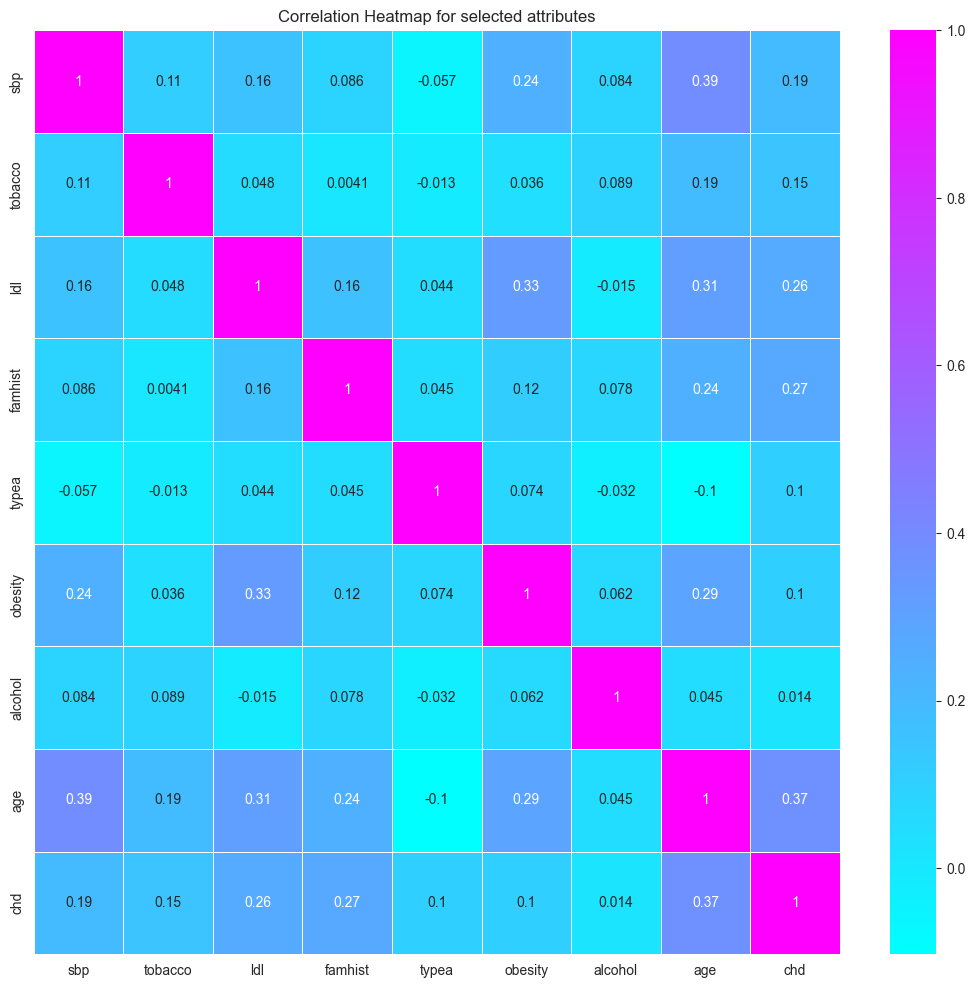

In [13]:
# == Plot heatmap ==

plot_correlation_heatmap(data=data_numeric, columns=data_numeric.columns)

In [14]:
        # == Pair plots ==
# sns.pairplot(data=data, x_vars=["column_1"], y_vars=["column_2"], hue="mode", markers=["o", "s"])
# plt.grid(True, linestyle="--")
# plt.title("Set title")
# !! Ignore titles as when we move them to overleaf, we will write captions

# == Bar plots ==
# sns.set_style("whitegrid") 
# plt.figure(figsize=(10, 5))
# plt.subplot(121)
# sns.barplot(data=data, x="column_1", y="column_2", hue="mode")
# plt.title("Set title")
# plt.gca().yaxis.grid(True, linestyle='--', alpha=0.8)

# plt.subplot(122)
# sns.barplot(data=data, x="column_1", y="column_2", hue="key")
# plt.title("Set title")
# plt.legend(title="Set legend title", loc='center left', bbox_to_anchor=(1, 0.5))

# Adjust the layout
# plt.tight_layout()
# plt.gca().yaxis.grid(True, linestyle='--', alpha=0.8)

# Show the plot
# plt.show()

## Statistical Analysis

In [15]:
from scipy.stats import kstest
from scipy.stats import lognorm
from scipy.stats import shapiro

In [15]:
import pandas as pd
from scipy.stats import kstest, shapiro, lognorm

# Assuming data_numeric is your DataFrame with numerical columns

alpha = 0.05

columns = []
ks_results = []
shapiro_results = []
lognorm_results = []

# For storing p-values
ks_p_values = []
shapiro_p_values = []
lognorm_p_values = []

for column in data_numeric.columns:
    data_column = data_numeric[column]

    ks_statistic, ks_p_value = kstest(data_column, "norm")
    shapiro_statistic, shapiro_p_value = shapiro(data_column)
    lognorm_params = lognorm.fit(data_column)
    lognorm_statistic, lognorm_p_value = kstest(data_column, "lognorm", lognorm_params)
    
    columns.append(column)
    ks_results.append("Yes" if ks_p_value > alpha else "No")
    shapiro_results.append("Yes" if shapiro_p_value > alpha else "No")
    lognorm_results.append("Yes" if lognorm_p_value > alpha else "No")

    # Append p-values
    ks_p_values.append(ks_p_value)
    shapiro_p_values.append(shapiro_p_value)
    lognorm_p_values.append(lognorm_p_value)

results_df = pd.DataFrame({
    "Attribute": columns,
    "KS Test Normal": ks_results,
    "KS Test p-value": ks_p_values,
    # "Shapiro Test Normal": shapiro_results,
    # "Shapiro Test p-value": shapiro_p_values,
    "Log-Normal Test": lognorm_results,
    "Log-Normal Test p-value": lognorm_p_values
})

latex_table = results_df.to_latex(index=False)
print(latex_table)


\begin{tabular}{llrlr}
\toprule
Attribute & KS Test Normal & KS Test p-value & Log-Normal Test & Log-Normal Test p-value \\
\midrule
sbp & No & 0.000000 & Yes & 0.071207 \\
tobacco & No & 0.000000 & No & 0.000000 \\
ldl & No & 0.000000 & Yes & 0.999353 \\
famhist & No & 0.000000 & No & 0.000000 \\
typea & No & 0.000000 & Yes & 0.379466 \\
obesity & No & 0.000000 & Yes & 0.772367 \\
alcohol & No & 0.000000 & No & 0.000000 \\
age & No & 0.000000 & No & 0.000931 \\
chd & No & 0.000000 & No & 0.000000 \\
\bottomrule
\end{tabular}



/home/myrgkol/.conda/envs/mldm/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:6480: RuntimeWarning: overflow encountered in divide
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)
/home/myrgkol/.conda/envs/mldm/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


## Feasibility of Regression Analysis

In [16]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [17]:
# For all the attributes -> see BLUE test 

correlation_matrix = data_numeric.corr()

# We have to device on the regression task. One idea would be to predict blood pressure

# Fit a linear regression model
X = data_numeric.drop('sbp', axis=1)  # independent variables
y = data_numeric['sbp']  # dependent variable

# Add a constant to the model (intercept)
X_const = sm.add_constant(X)

# OLS regression
model = sm.OLS(y, X_const).fit()

# Variance Inflation Factor (VIF) for checking multicollinearity
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    sbp   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                     12.72
Date:                Tue, 27 Feb 2024   Prob (F-statistic):           1.51e-16
Time:                        12:36:45   Log-Likelihood:                -2003.6
No. Observations:                 462   AIC:                             4025.
Df Residuals:                     453   BIC:                             4062.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        103.6035      6.541     15.838      0.000      90.748     116.459
tobacco        0.0852      0.219      0.389      0.697      -0.345       0.515
ldl            0.0713      0.468      0.152      0.879      -0.849       0.992
famhist       -1.2392      1.869     -0.663      0.508      -4.911       2.433
typea         -6.1704      5.910     -1.044      0.297     -17.786       5.445
obesity        0.6779      0.226      3.004      0.003       0.234       1.121
alcohol        0.0825      0.037      2.258      0.024       0.011       0.154
age            0.4296      0.075      5.753      0.000       0.283       0.576
chd            2.7211      2.086      1.305      0.193      -1.378       6.820
==============================================================================
Omnibus:                       71.198   Durbin-Watson:                   1.909
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              122.131
Skew:                           0.921   Prob(JB):                     3.02e-27
Kurtosis:                       4.718   Cond. No.                         494.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""